In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras.models import Model
from keras import optimizers
from datetime import datetime as dt
import pickle
import random
import os
import string
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 911kB 7.6MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:12 http://archive.ubuntu.com/ubuntu bionic-upd

In [3]:
#Scraping data of last 4 years
name = 'Asian Paints'
market = 'BSE'

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver =webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


<selenium.webdriver.chrome.webdriver.WebDriver (session="dc163705129d6a4960c5d19905027629")>

In [4]:
import time
from bs4 import BeautifulSoup

#load site
driver.get("https://www.moneycontrol.com/stocks/histstock.php?classic=true");

#name and market
name = 'Tata Motors'
market = 'BSE'
searchBar = driver.find_element_by_id("mycomp")
searchBar.send_keys(u'\ue009' + u'\ue003')
searchBar.send_keys(name)
time.sleep(2)
namelist = driver.find_elements_by_xpath("//div[@id='suggest']//ul[@class='suglist']/li/a")
#getting perfect name of stock
for i in namelist:
        data = BeautifulSoup(i.get_attribute('innerHTML'),'html.parser').text
        data = data.lower()
        if(data.find(name.lower()) != -1):
            i.click()
            break

#choosing correct market
markets = driver.find_elements_by_xpath("//select[@id='ex']/option");
for i in markets:
    data = BeautifulSoup(i.get_attribute('innerHTML'),'html.parser').text.lower()
    if(data == market.lower()):
        i.click()
#changing date

today = date.today()
d1 = today.strftime("%d/%m/%Y")

print(d1, type(d1))
year = '2010'
currMonth = d1.split('/')[1]
currDate = d1.split('/')[0]

dailyForm = driver.find_element_by_name("frm_dly")
frmyear = dailyForm.find_element_by_class_name('PT4').find_elements_by_tag_name('select')[2].find_elements_by_tag_name('option')
for i in frmyear:
    if(i.text.lower().find(year) != -1):
        i.click()
        break
endmonth = dailyForm.find_elements_by_class_name('PT4')[1].find_elements_by_tag_name('select')[1].find_elements_by_tag_name('option')
for i in endmonth:
    if(i.get_attribute('value') == currMonth):
        i.click();
        break
endDate = dailyForm.find_elements_by_class_name('PT4')[1].find_elements_by_tag_name('select')[0].find_elements_by_tag_name('option')
for i in endDate:
    if(i.get_attribute('value') == currDate):
        i.click();
        break
dailyForm.find_elements_by_class_name('PT4')[1].find_element_by_tag_name('input').click()


##Making Table for data
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
pdTable = pd.DataFrame(columns = columns)
i = 0
while(1):
    pointers = driver.find_element_by_xpath("//div[@class='gray2_11']/a[last()]")
    table = driver.find_element_by_xpath("//div[@class='MT12']")
    columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    data = BeautifulSoup(table.get_attribute('innerHTML'),'lxml')
    temp = pd.read_html(str(data), header = 0)
    temp[0].drop(columns = ['- SPREAD -', '- SPREAD -.1'], axis = 1, inplace = True)
    print(type(temp[0]))
    print(temp[0].columns)
    temp = temp[0].loc[1:]
    pdTable = pd.concat([pdTable, temp], axis=0)
    print(i)
    i+=1
    if(pointers.text.find("Next") == -1):
        break
    else: 
        time.sleep(1)
        driver.get(pointers.get_attribute('href'))
print(pdTable)

04/05/2021 <class 'str'>
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
0
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
1
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
2
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
3
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
4
<class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
5
           Date    Open    High     Low   Close   Volume
1    03-05-2021  285.65  294.70  285.15  293.00  2809702
2    30-04-2021  299.00  301.30  292.85  293.95  1677637
3    29-04-2021  308.00  310.20  301.35  301.85  1683634
4    28-04-2021  302.55  309.60  302.55  305.90  1987473
5    2

In [5]:
plt.rcParams['figure.figsize'] = 20,10
x_normaliser = MinMaxScaler(feature_range=(0,1))
df = pdTable
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']
df = df.sort_index(ascending=True, axis=0)
df = df.drop('Date', axis = 1)
df.head()
typesDict = {
    'Open': float, 
    'High': float,
    'Low': float,
    'Close':float,
    'Volume':float
}
df = df.astype(typesDict)
print(df.info())
print(df.dtypes)
print(df.describe())
plt.figure(figsize=(16, 8))
data = df
data_normalised = x_normaliser.fit_transform(df)
print(data_normalised[0:20])
print(data)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2811 entries, 2010-01-04 to 2021-05-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2811 non-null   float64
 1   High    2811 non-null   float64
 2   Low     2811 non-null   float64
 3   Close   2811 non-null   float64
 4   Volume  2811 non-null   float64
dtypes: float64(5)
memory usage: 131.8 KB
None
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
              Open         High          Low        Close        Volume
count  2811.000000  2811.000000  2811.000000  2811.000000  2.811000e+03
mean    301.338808   305.661903   296.418292   300.759843  1.904024e+06
std     129.403431   130.516865   127.958820   129.120603  5.032379e+06
min      67.050000    68.000000    63.600000    65.300000  4.510000e+02
25%     183.425000   186.150000   180.145000   182.775000  5.544750e+05
50%     284.450000   289.200000   

<Figure size 1152x576 with 0 Axes>

In [6]:
history_points = 65 # 75 for Asuan Paints
histories_normalised =      np.array([data_normalised[i  : i + history_points].copy() for i in range(len(data_normalised) - history_points)])
next_day_open_values_normalised = np.array([data_normalised[:,0][i + history_points].copy() for i in range(len(data_normalised) - history_points)])
next_day_open_values_normalised = np.expand_dims(next_day_open_values_normalised, -1)

next_day_open_values = np.array([data.iloc[:,0][i + history_points].copy() for i in range(len(data) - history_points)])
next_day_open_values = np.expand_dims(next_day_open_values, -1)

def calc_ema(his, time_period):
    # https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    sma = np.mean(his[:,3])
    ema_values = [sma]
    k = 2 / (1 + time_period)
    for i in range(len(his) - time_period, len(his)):
        close = his[i][3]
        ema_values.append(close * k + ema_values[-1] * (1 - k))
    return ema_values[-1]

def RSI(values, time_period):
  up , down = 0.0001, 0.0001

  for i in range(len(values)-time_period-1, len(values)-1):
    delta = values[i+1][3]-values[i][3];
    if(delta >= 0):
      up += delta
    else:
      down -= delta
    rs = up/down
    rsi = 100- (100/(1+rs))
    rsi = max(rsi, 1)
    return rsi/100

technical_indicators = []
for his in histories_normalised:
    # note since we are using his[3] we are taking the SMA of the closing price
    sma = np.mean(his[:,3])
    macd = calc_ema(his, 12) - calc_ema(his, 26)
    # rsi = RSI(his, 50)
    technical_indicators.append(np.array([ macd, ]))

technical_indicators = np.array(technical_indicators)
tech_ind_normaliser = MinMaxScaler()
technical_indicators_normalised = tech_ind_normaliser.fit_transform(technical_indicators)

y_normaliser = MinMaxScaler()
y_normaliser.fit(next_day_open_values)
print(histories_normalised.shape, next_day_open_values.shape,next_day_open_values_normalised.shape)

(2746, 65, 5) (2746, 1) (2746, 1)


In [7]:
 ## Dividing into test and train
# test_split = 0.99
# train_len = int(histories_normalised.shape[0] * test_split)
# test_len = histories_normalised.shape[0]-train_len
test_len = 40
train_len = histories_normalised.shape[0]-test_len
ohlcv_train = histories_normalised[:train_len]
tech_ind_train = technical_indicators[:train_len]
y_train = next_day_open_values_normalised[:train_len]

ohlcv_test = histories_normalised[train_len:]
tech_ind_test = technical_indicators[train_len:]
y_test = next_day_open_values_normalised[train_len:]

unscaled_y_test = next_day_open_values[train_len:]

print(ohlcv_train.shape, ohlcv_test.shape, y_train.shape, y_test.shape, unscaled_y_test.shape)

(2706, 65, 5) (40, 65, 5) (2706, 1) (40, 1) (40, 1)


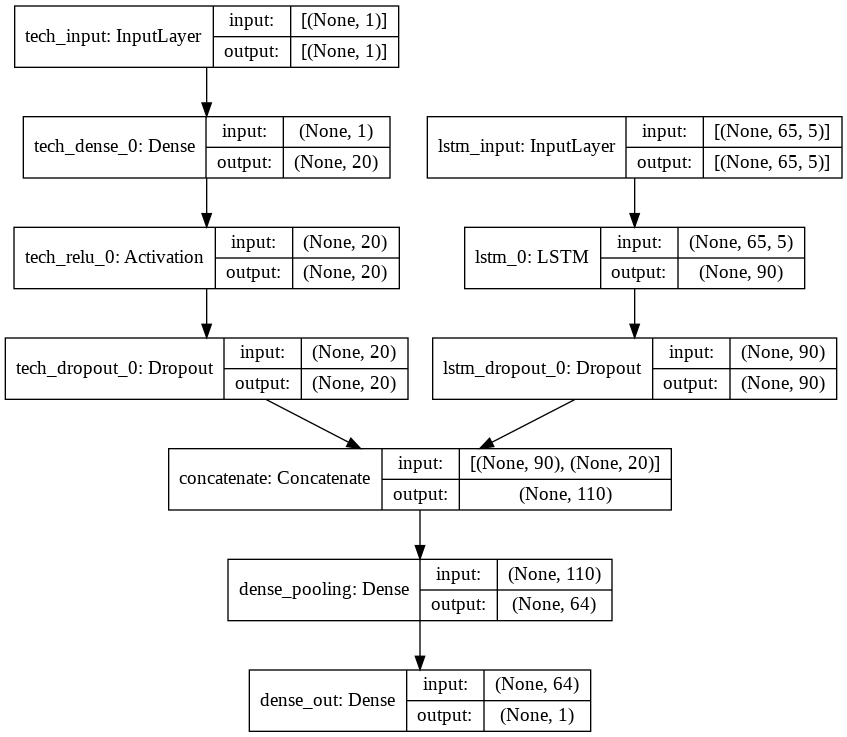

In [10]:

#Model 2
lstm_input = Input(shape=(history_points, 5), name='lstm_input')
dense_input = Input(shape=(technical_indicators.shape[1],), name='tech_input')
 
# the first branch operates on the first input
x = LSTM(90, name='lstm_0')(lstm_input)
x = Dropout(0.27, name='lstm_dropout_0')(x)
lstm_branch = Model(inputs=lstm_input, outputs=x)
 
# the second branch opreates on the second input
y = Dense(20, name='tech_dense_0')(dense_input)
y = Activation("relu", name='tech_relu_0')(y)
y = Dropout(0.2, name='tech_dropout_0')(y)
technical_indicators_branch = Model(inputs=dense_input, outputs=y)
 
# combine the output of the two branches
combined = concatenate([lstm_branch.output, technical_indicators_branch.output], name='concatenate')
 
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)
 
# our model will accept the inputs of the two branches and then output a single value
model = Model(inputs=[lstm_branch.input, technical_indicators_branch.input], outputs=z)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam,
              loss='mse')

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [11]:
print(ohlcv_train.shape, tech_ind_train.shape, y_train.shape)
model.fit(x=[ohlcv_train, tech_ind_train], y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)
evaluation = model.evaluate([ohlcv_test, tech_ind_test], y_test)
print(evaluation)


(2706, 65, 5) (2706, 1) (2706, 1)
Epoch 1/50
77/77 [==============================] - 5s 45ms/step - loss: 0.0681 - val_loss: 0.0051
Epoch 2/50
77/77 [==============================] - 3s 40ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 3/50
77/77 [==============================] - 3s 40ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 4/50
77/77 [==============================] - 3s 40ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 5/50
77/77 [==============================] - 3s 40ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/50
77/77 [==============================] - 3s 40ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/50
77/77 [==============================] - 3s 40ms/step - loss: 0.0014 - val_loss: 9.8147e-04
Epoch 8/50
77/77 [==============================] - 3s 39ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/50
77/77 [==============================] - 3s 41ms/step - loss: 0.0014 - val_loss: 8.2594e-04
Epoch 10/50
77/77 [==============================] - 3s 41ms/step -

In [13]:

y_test_predicted = []
y_test_predicted = model.predict([ohlcv_test, tech_ind_test])
# model.predict returns normalised values
# now we scale them back up using the y_scaler from before
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

# also getting predictions for the entire dataset, just to see how it performs
y_predicted = model.predict([histories_normalised, technical_indicators])
y_predicted = y_normaliser.inverse_transform(y_predicted)
print(y_test_predicted.shape, unscaled_y_test.shape)
assert unscaled_y_test.shape == y_test_predicted.shape
real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
print(scaled_mse)



(40, 1) (40, 1)
88.22305814637951


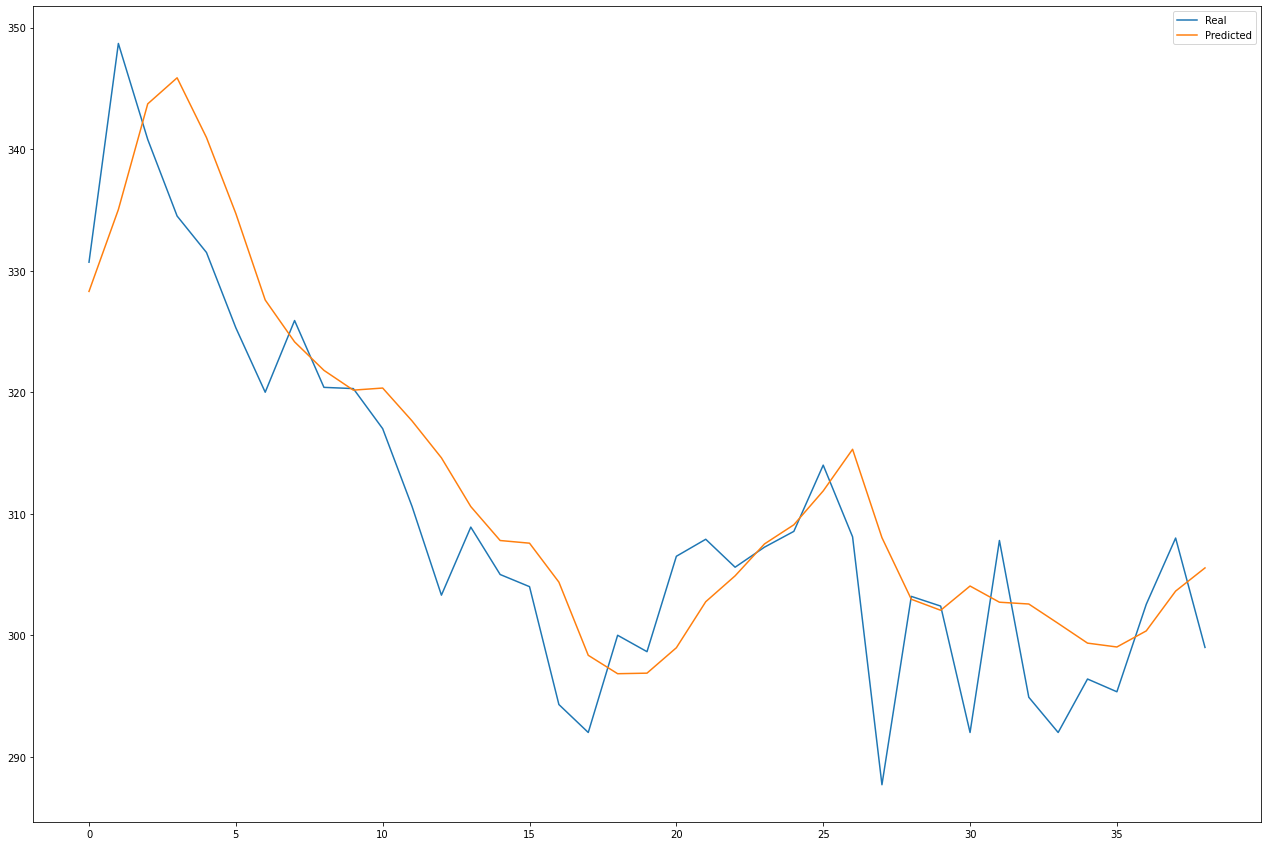

In [14]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


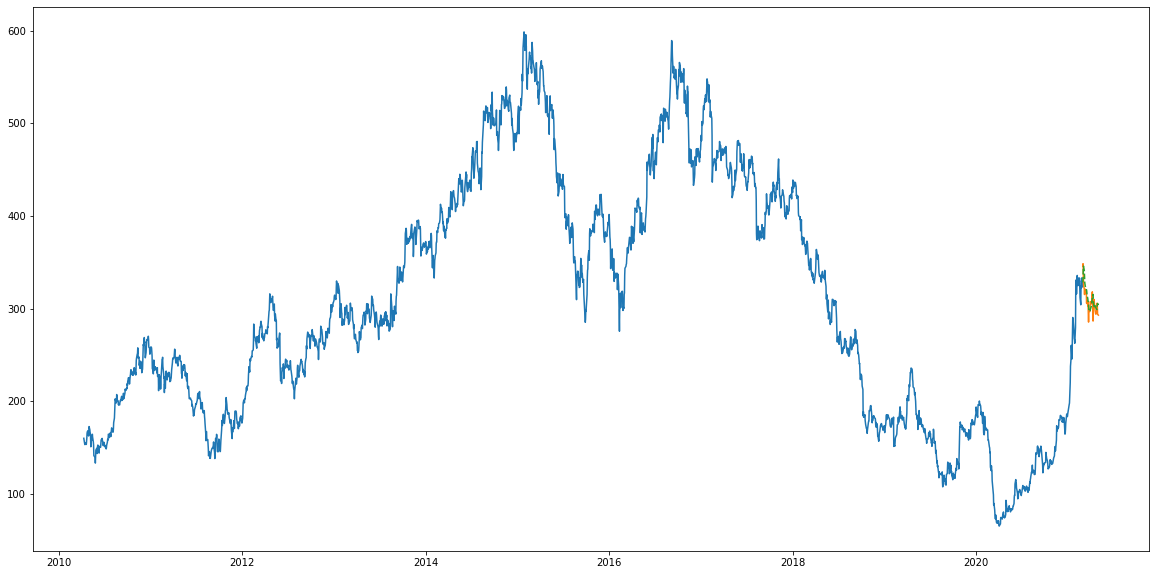

In [15]:
data1 = data[history_points: ]
train = data1[:train_len]
test = data1[train_len:]
test['Predictions'] = y_test_predicted
plt.plot(train['Close'])
plt.plot(test['Close'] )
plt.plot(test['Predictions'],linestyle='--' )


In [16]:
## Trades by predictions
buys = []
sells = []
thresh = 0.2

print(ohlcv_test.shape)
x = 0
for ohlcv, ind in zip(ohlcv_test, tech_ind_test):
    normalised_price_today = ohlcv[-1][0]
    normalised_price_today = np.array([[normalised_price_today]])
    price_today = y_normaliser.inverse_transform(normalised_price_today)
    ohlcvlist = []
    ohlcvlist.append(ohlcv)
    indList = []
    indList.append(ind)
    indList = np.array(indList)
    ohlcvlist = np.array(ohlcvlist)

    predicted = np.squeeze(y_normaliser.inverse_transform( model.predict(x = [ohlcvlist, indList])))
    delta = predicted - price_today
    # print(delta)
    if delta > thresh:
        buys.append((x, price_today[0][0]))
    elif delta < -thresh:
        sells.append((x, price_today[0][0]))
    x += 1
print(buys)
print(sells)


(40, 65, 5)
[(1, 330.7), (3, 340.8), (4, 334.5), (5, 331.5), (6, 325.3), (7, 320.0), (11, 317.0), (12, 310.6), (13, 303.3), (15, 305.0), (16, 304.0), (17, 294.3), (18, 292.0), (20, 298.65000000000003), (23, 305.6), (24, 307.24999999999994), (25, 308.55), (26, 314.0), (28, 287.7), (30, 302.4), (31, 292.0), (33, 294.9), (34, 292.0), (35, 296.4), (36, 295.35), (37, 302.55), (39, 298.99999999999994)]
[(0, 329.9), (2, 348.7), (8, 325.9), (9, 320.4), (14, 308.9), (19, 300.0), (21, 306.5), (22, 307.9), (29, 303.2), (32, 307.8), (38, 308.0)]


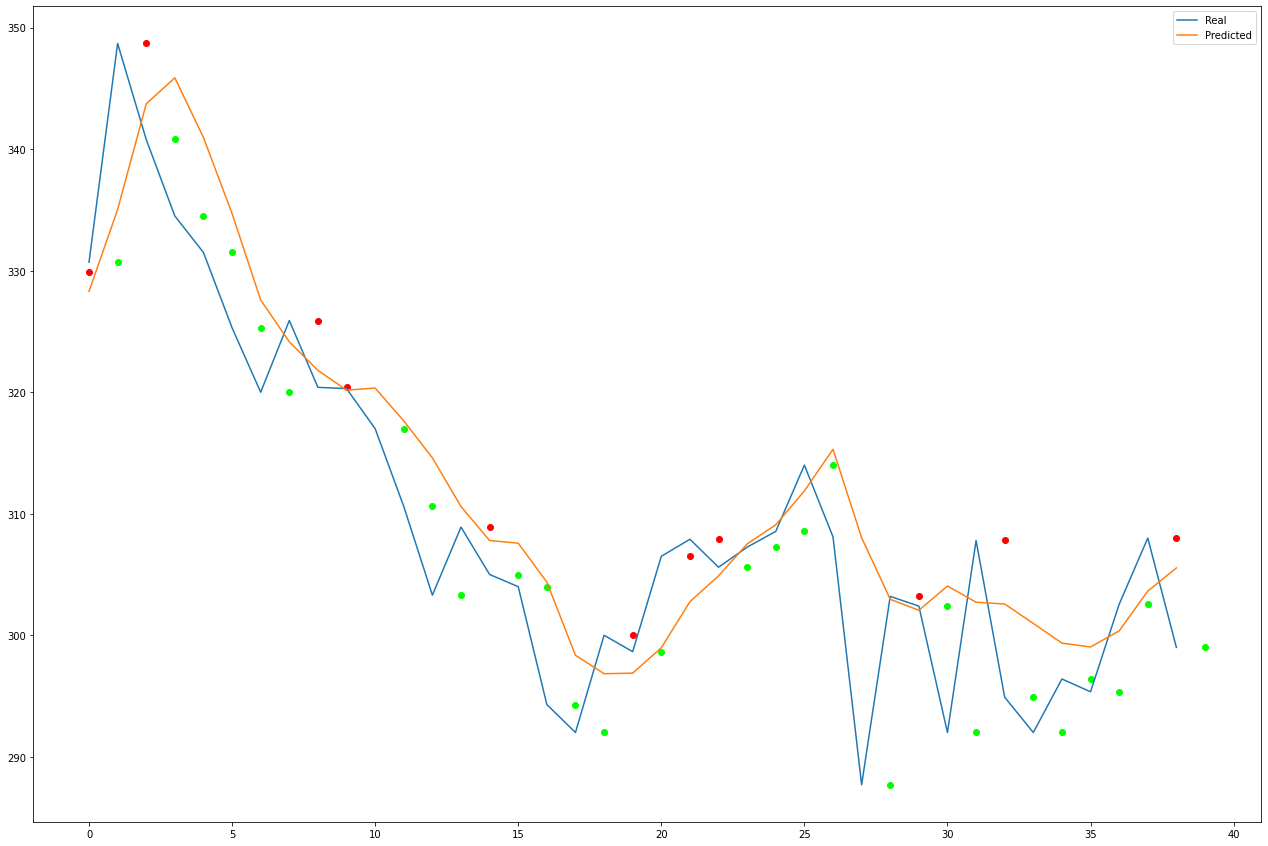

In [17]:
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')
if(len(buys)>0):
  plt.scatter(list(list(zip(*buys))[0]), list(list(zip(*buys))[1]), c='#00ff00')
if(len(sells)>0):
  plt.scatter(list(list(zip(*sells))[0]), list(list(zip(*sells))[1]), c='#ff0000')

# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

In [18]:
def compute_earnings(buys, sells):
  purchase_amt = 10
  stock = 0
  balance = 0
  maxInvest = 0
  currInvest = 0
  while len(buys) > 0 and len(sells) > 0:
      if buys[0][0] < sells[0][0]:
          # time  to buy $10 worth of stock
          balance -= purchase_amt
          stock += purchase_amt / buys[0][1]
          buys.pop(0)
          currInvest += 10
          maxInvest = max(currInvest, maxInvest)

      else:
          # time to sell all of our stock
          balance += stock * sells[0][1]
          stock = 0
          sells.pop(0)
          currInvest = 0
  print(balance,stock,  maxInvest)
compute_earnings(buys, sells)

2.7159559412580023 0 50


In [ ]:
def compute_earnings(buys, sells):
  purchase_amt = 10
  stock = 0
  balance = 10
  maxInvest = 0
  currInvest = 0
  while len(buys) > 0 and len(sells) > 0:
      if buys[0][0] < sells[0][0]:
          # time  to buy $10 worth of stock
          pur_here = min(purchase_amt, 10)
          balance -= pur_here
          purchase_amt -= pur_here
          stock += pur_here / buys[0][1]
          buys.pop(0)
      else:
          # time to sell all of our stock
          balance += stock * sells[0][1]
          purchase_amt += stock*sells[0][1]
          stock = 0
          sells.pop(0)
          currInvest = 0
  print(purchase_amt, balance,stock,  maxInvest)
compute_earnings(buys, sells)

10 10 0 0
